In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/ML competition/Malaria/cell_images/Train'
valid_path = '/content/drive/MyDrive/ML competition/Malaria/cell_images/Test'

In [ ]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in mobilnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/ML competition/Malaria/cell_images/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/ML competition/Malaria/cell_images/Train/Parasitized',
 '/content/drive/MyDrive/ML competition/Malaria/cell_images/Train/Uninfected']

In [ ]:
x = Flatten()(mobilnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML competition/Malaria/cell_images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 27376 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML competition/Malaria/cell_images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 182 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
856/856 [==============================] - 9215s 11s/step - loss: 0.3713 - accuracy: 0.8288 - val_loss: 0.2883 - val_accuracy: 0.8901
Epoch 2/5
856/856 [==============================] - 320s 374ms/step - loss: 0.2005 - accuracy: 0.9354 - val_loss: 0.2289 - val_accuracy: 0.9341
Epoch 3/5
856/856 [==============================] - 320s 374ms/step - loss: 0.1845 - accuracy: 0.9414 - val_loss: 0.1031 - val_accuracy: 0.9725
Epoch 4/5
856/856 [==============================] - 321s 375ms/step - loss: 0.1692 - accuracy: 0.9436 - val_loss: 0.1488 - val_accuracy: 0.9670
Epoch 5/5
856/856 [==============================] - 320s 373ms/step - loss: 0.1688 - accuracy: 0.9466 - val_loss: 0.1096 - val_accuracy: 0.9615


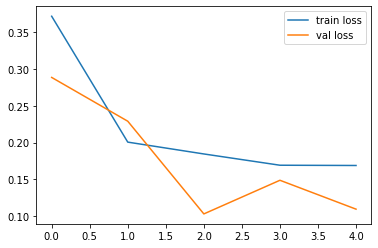

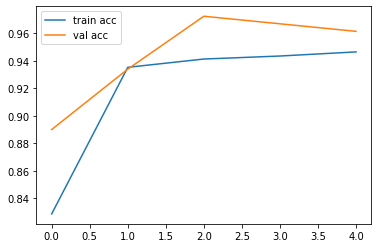

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

NameError: ignored

In [ ]:

y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[4.0415909e-02, 9.5958406e-01],
       [3.9984528e-02, 9.6001542e-01],
       [3.7085701e-02, 9.6291429e-01],
       [9.4490641e-01, 5.5093583e-02],
       [9.6596664e-01, 3.4033347e-02],
       [9.9996793e-01, 3.2098469e-05],
       [3.5365429e-02, 9.6463460e-01],
       [1.4693586e-02, 9.8530638e-01],
       [9.6876287e-01, 3.1237155e-02],
       [9.8592257e-01, 1.4077440e-02],
       [9.9926859e-01, 7.3146576e-04],
       [1.1055246e-02, 9.8894471e-01],
       [2.5434020e-01, 7.4565977e-01],
       [1.6657853e-02, 9.8334217e-01],
       [3.2030836e-01, 6.7969161e-01],
       [1.6892251e-02, 9.8310781e-01],
       [2.7605357e-02, 9.7239459e-01],
       [9.9855906e-01, 1.4409964e-03],
       [9.8074329e-01, 1.9256696e-02],
       [9.9867719e-01, 1.3227774e-03],
       [9.9862802e-01, 1.3720493e-03],
       [1.1105658e-02, 9.8889434e-01],
       [9.8496675e-01, 1.5033236e-02],
       [1.8998725e-02, 9.8100132e-01],
       [2.2061715e-02, 9.7793829e-01],
       [8.1150174e-02, 9.

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:

y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/ML competition/Malaria/cell_images/Test/Uninfected/C1_thinF_IMG_20150604_104722_cell_115.png',target_size=(224,224))

NameError: ignored

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
